In [1]:
import pandas as pd
import numpy as np

installs_dtypes = {'application_id': 'category', 'ref_type': 'category', 'device_countrycode': 'category',
                   'device_brand': 'category', 'device_model' : 'category', 'session_user_agent': 'category',
                   'user_agent': 'category', 'kind': 'category', 'device_language': 'category'}

installs = pd.read_csv('installs.csv', dtype = installs_dtypes)

installs["created"] =  pd.to_datetime(installs["created"], errors = "coerce") #parseo de fechas

installs.drop('attributed', axis = 1, inplace = True) #son todas false
installs.drop('click_hash', axis = 1, inplace = True) #son todas NaN

In [2]:
events_dtypes = {'event_id': 'category', 'ref_type': 'category', 'ref_hash': 'category', 'application_id': 'category',
                   'attributed': 'category', 'device_countrycode': 'category', 'device_os_version': 'category',
                   'device_brand' : 'category', 'device_model' : 'category', 'device_city': 'category', 'session_user_agent': 'category', 'user_agent': 'category', 'carrier': 'category',
                   'kind': 'category', 'device_os' : 'category', 'wifi': 'category', 'connection_type': 'category',
                   'device_language': 'category'}

events = pd.read_csv('events.csv', dtype = events_dtypes, low_memory=False)

events["date"] =  pd.to_datetime(events["date"], errors = "coerce")

## ¿Cuáles son las tres aplicaciones más usadas y cómo es la evolución de los eventos realizados sobre ellas por hora?

In [95]:
indices_aplicaciones_top = list(events['application_id'].value_counts().head(3).index)

In [96]:
indices_aplicaciones_top

['66', '64', '145']

In [97]:
aplicaciones_mas_navegadas = events.loc[events['application_id'].isin(indices_aplicaciones_top), ['application_id']]

In [98]:
aplicaciones_mas_navegadas['Cantidad de eventos'] = 1
agrupacion_aplicaciones_top = aplicaciones_mas_navegadas.groupby('application_id').agg({'Cantidad de eventos':'count'})

In [101]:
eventos_por_hora = events.loc[events['application_id'].isin(indices_aplicaciones_top), ['date', 'application_id']]

In [102]:
eventos_por_hora['Hora'] = eventos_por_hora['date'].dt.hour

In [103]:
eventos_por_hora['cant_eventos'] = 1
agrup_eventos_por_hora = eventos_por_hora.groupby(['Hora','application_id']).agg({'cant_eventos': 'count'})

Text(0, 0.5, 'Cantidad de eventos')

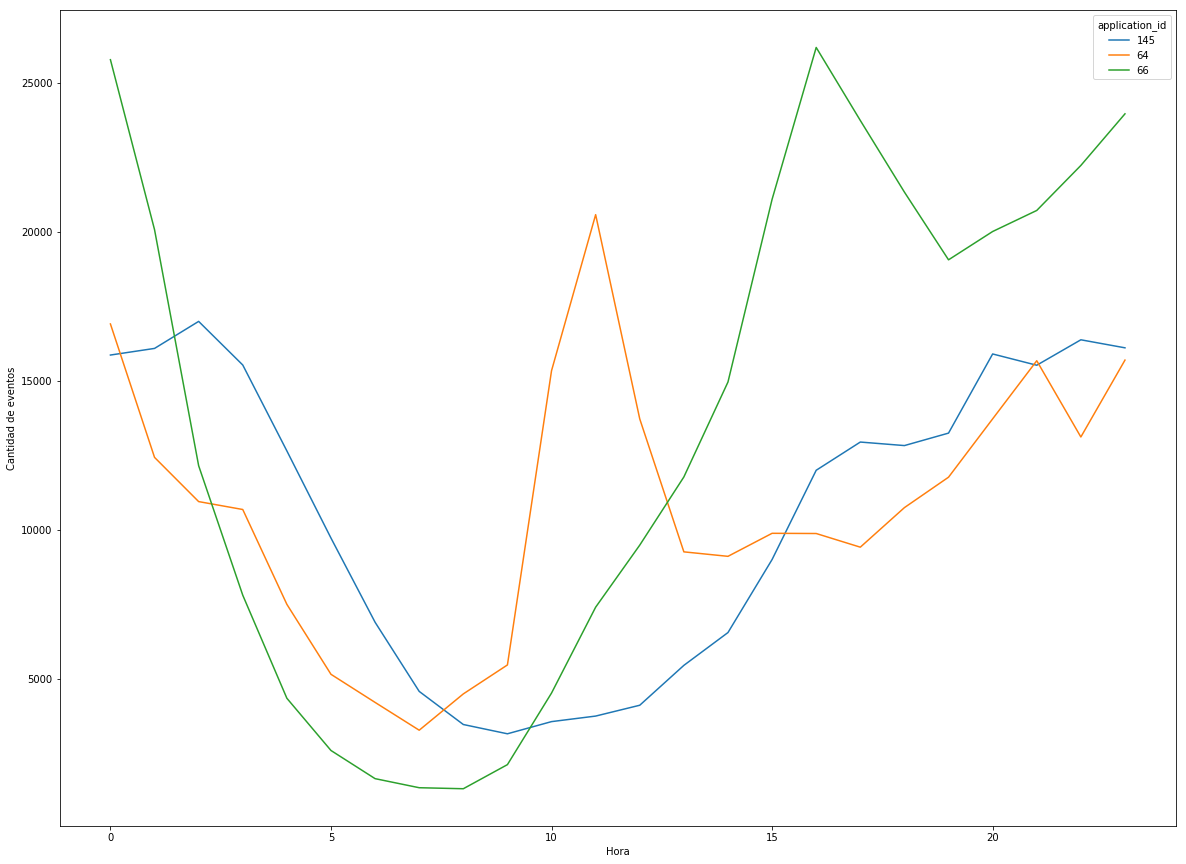

In [112]:
plot = agrup_eventos_por_hora.unstack().cant_eventos.plot(figsize = (20,15))
plot.set_ylabel('Cantidad de eventos')